In [19]:
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from os import environ

def get_target_pair_data(input_data, target_key):
    max_y = 0
    min_y = 1000
    target_data = []
    for i in range(len(cols)):
        each_data = pd.concat([pd.DataFrame(input_data.loc[:, cols[i]]['time_list']).T], axis=1)
        temp_data = each_data.loc[target_key, :]
        current_max = temp_data.T.values.max()
        current_min = temp_data.T.values.min()
        if current_max > max_y:
            max_y = current_max
        if current_min < min_y:
            min_y = current_min
        idx_list = temp_data.index.tolist()
        idx_list[0] = cols[i]
        temp_data.index = idx_list
        target_data.append(temp_data)
    target_data = pd.concat(target_data)
    return target_data, max_y, min_y

def get_specific_pair_data(firefox_data, chrome_data, target_key):
    max_y = 0
    min_y = 1000
    firefox_temp_data = firefox_data.loc[target_key, :]
    chrome_temp_data = chrome_data.loc[target_key, :]
    for col in cols:
        if 'firefox' in col:
            current_max = firefox_temp_data.values.max()
            current_min = firefox_temp_data.values.min()
            idx_list = firefox_temp_data.index.tolist()
            idx_list[0] = 'Firefox - ' + str(target_key[0])
            firefox_temp_data.index = idx_list
        elif 'chrome' in col:
            current_max = chrome_temp_data.values.max()
            current_min = chrome_temp_data.values.min()
            idx_list = chrome_temp_data.index.tolist()
            idx_list[0] = 'Chrome - ' + str(target_key[0])
            chrome_temp_data.index = idx_list
        if current_max > max_y:
            max_y = current_max
        if current_min < min_y:
            min_y = current_min
    target_data = pd.concat([firefox_temp_data, chrome_temp_data])
    return target_data, max_y, min_y

filename = 'data/ftreport.json'
fig_no = 30
if fig_no == 1:
    fig_size = 10
else:
    fig_size = 30

pd.options.display.float_format = '{:10,.2f}'.format
pd.set_option('display.width', 999)

key_index = ['actual_paint_frames',
            'expected_frames', 
            'frame_throughput',
            'long_frame']

with open(filename) as data_file:
    data = json.load(data_file)
fps = data["video-recording-fps"]
remove_data = ["video-recording-fps"]
for item in remove_data:
    del data[item]
cols = list()
d = pd.DataFrame(data)
for col in d:
    cols.append(str(col))
for col in cols:
    if 'firefox' in col:
        firefox_case = col
        firefox_df = pd.concat([pd.DataFrame(d.loc[:, col]['time_list']).T], axis=1)
        firefox_dft = firefox_df.loc[key_index, :]
    elif 'chrome' in col:
        chrome_case = col
        chrome_df = pd.concat([pd.DataFrame(d.loc[:, col]['time_list']).T], axis=1)
        chrome_dft = chrome_df.loc[key_index, :]

non_freeze_frame_timestamps = pd.concat([pd.DataFrame(d[column]['time_list']) for column in d], axis=1).loc[:,'non_freeze_frame_timestamps']
non_freeze_frame_timestamps.columns = d.columns
case_name_list = list(non_freeze_frame_timestamps)

for case in case_name_list:
    c = non_freeze_frame_timestamps[case]
    if 'firefox' in case:
        firefox_case = case
        firefox_frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T
    elif 'chrome' in case:
        chrome_case = case
        chrome_frame = pd.DataFrame([pd.Series(i).diff()
                                  .dropna()
                                  .apply(lambda x: np.round(x/11.11)) for i in c]).T

firefox_describe = firefox_frame.describe()
firefox_quantile = firefox_frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')
chrome_describe = chrome_frame.describe()
chrome_quantile = chrome_frame.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99], interpolation='nearest')

In [20]:
pd.concat([pd.Series({'[Firefox]': 'NaN'}), firefox_dft, pd.Series({'[Chrome]': 'NaN'}), chrome_dft])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
[Firefox],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_paint_frames,113,112,114,115,112,113,113,113,113,114,...,114,114,113,114,113,112,113,114,113,111
expected_frames,1967,1963,1960,1961,1961,1963,1960,1964,1962,1962,...,1964,1960,1961,1963,1962,1959,1962,1960,1962,1963
frame_throughput,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
long_frame,255.56,255.56,244.44,266.67,255.56,266.67,266.67,255.56,255.56,255.56,...,255.56,255.56,255.56,255.56,255.56,255.56,255.56,255.56,255.56,255.56
[Chrome],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actual_paint_frames,119,118,117,117,118,118,118,116,114,119,...,120,118,116,118,119,118,117,116,119,118
expected_frames,1964,1964,1963,1963,1963,1963,1964,1962,1961,1963,...,1963,1966,1962,1961,1963,1962,1962,1962,1962,1962
frame_throughput,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
long_frame,255.56,255.56,233.33,233.33,233.33,233.33,233.33,244.44,233.33,255.56,...,233.33,233.33,233.33,233.33,233.33,233.33,233.33,233.33,233.33,233.33


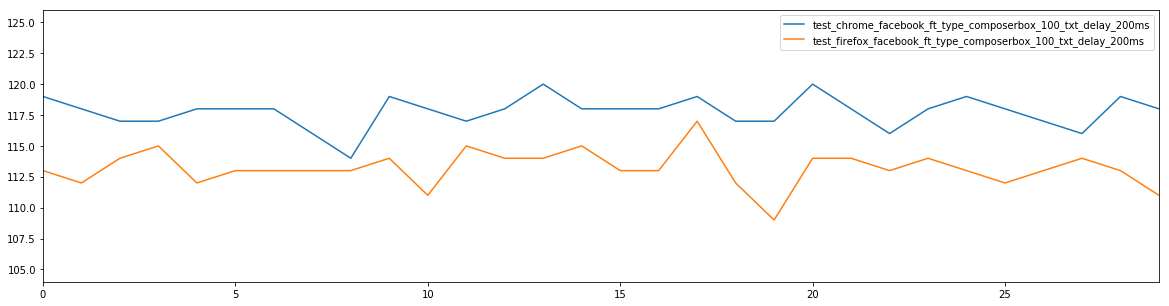

In [21]:
target_key = ['actual_paint_frames']
target_data, max_y, min_y = get_target_pair_data(d, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

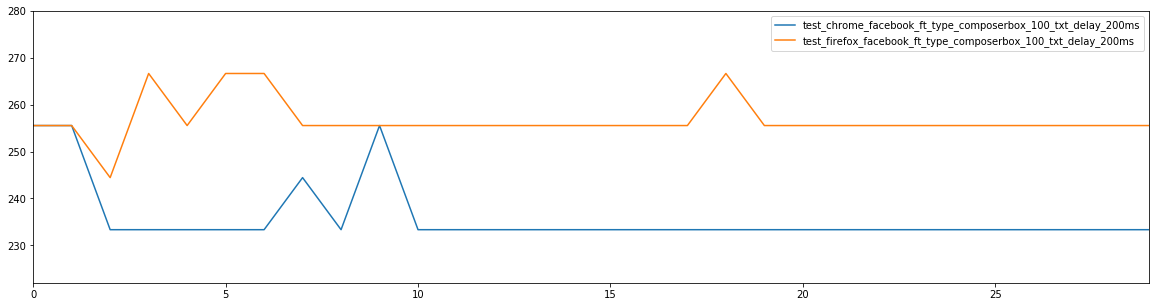

In [22]:
target_key=['long_frame']
target_data, max_y, min_y = get_target_pair_data(d, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

In [23]:
pd.concat([pd.concat([pd.Series({'[Firefox]': 'nan'}), firefox_quantile]), pd.concat([pd.Series({'[Chrome]': 'nan'}), chrome_quantile])])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
[Firefox],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
0.05,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.00,1.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00
0.25,18.00,19.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,...,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,19.00,18.00
0.5,19.00,20.00,19.00,19.00,20.00,19.00,19.00,19.00,19.00,19.00,...,20.00,19.00,20.00,19.00,20.00,19.00,19.00,19.00,20.00,19.00
0.75,21.00,20.00,20.00,21.00,21.00,21.00,21.00,20.00,21.00,21.00,...,21.00,20.00,21.00,21.00,21.00,21.00,20.00,21.00,20.00,21.00
0.95,22.00,21.00,22.00,22.00,22.00,23.00,22.00,22.00,22.00,22.00,...,22.00,22.00,21.00,22.00,21.00,22.00,22.00,22.00,21.00,22.00
0.99,23.00,22.00,22.00,22.00,23.00,24.00,23.00,23.00,23.00,23.00,...,23.00,23.00,22.00,23.00,23.00,22.00,23.00,23.00,23.00,23.00
[Chrome],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [24]:
pd.concat([pd.concat([pd.Series({'[Firefox]': 'nan'}), firefox_describe]), pd.concat([pd.Series({'[Chrome]': 'nan'}), chrome_describe])])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
[Firefox],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
count,112.00,111.00,113.00,114.00,111.00,112.00,112.00,112.00,112.00,113.00,...,113.00,113.00,112.00,113.00,112.00,111.00,112.00,113.00,112.00,110.00
mean,17.55,17.68,17.34,17.19,17.66,17.52,17.49,17.53,17.51,17.35,...,17.37,17.34,17.50,17.36,17.51,17.64,17.51,17.34,17.51,17.84
std,6.08,5.78,6.07,6.20,5.90,6.05,6.11,5.96,6.03,6.23,...,6.19,6.13,6.00,6.18,6.07,5.76,5.85,6.30,6.08,5.75
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,18.00,19.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,...,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,19.00,18.00
50%,19.00,20.00,19.00,19.00,20.00,19.00,19.00,19.00,19.00,19.00,...,20.00,19.00,19.50,19.00,19.50,19.00,19.00,19.00,20.00,19.00
75%,21.00,20.50,20.00,20.75,21.00,21.00,21.00,20.00,21.00,21.00,...,21.00,20.00,21.00,21.00,21.00,21.00,20.00,21.00,20.00,21.00
max,23.00,23.00,22.00,24.00,23.00,24.00,24.00,23.00,23.00,23.00,...,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00,23.00
[Chrome],nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


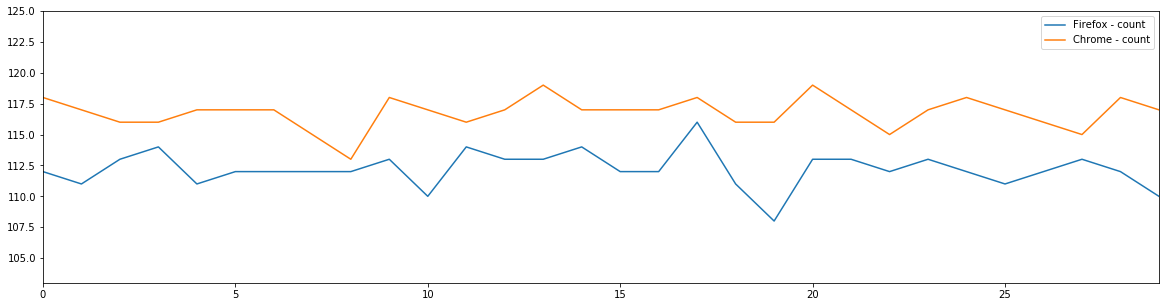

In [25]:
target_key = ['count']
target_data, max_y, min_y = get_specific_pair_data(firefox_describe, chrome_describe, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

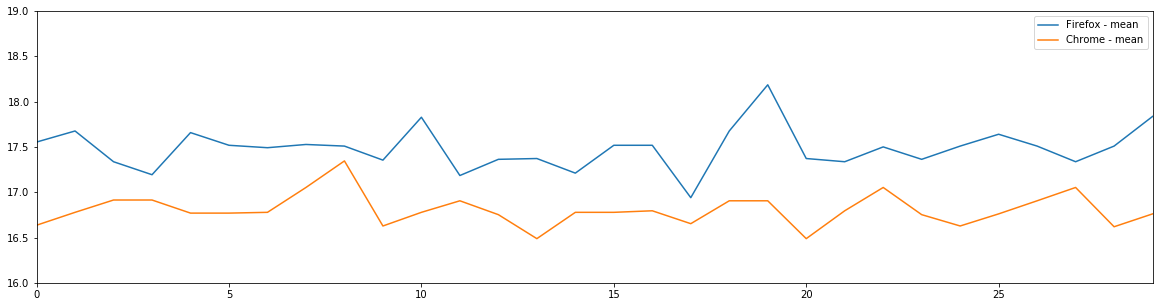

In [26]:
target_key = ['mean']
target_data, max_y, min_y = get_specific_pair_data(firefox_describe, chrome_describe, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

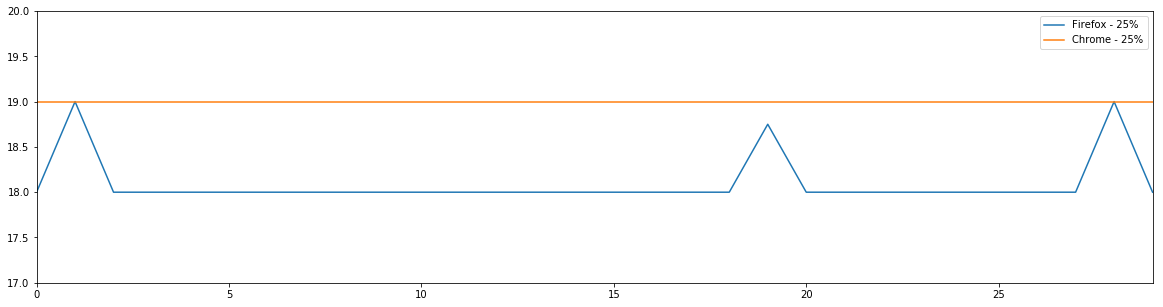

In [27]:
target_key = ['25%']
target_data, max_y, min_y = get_specific_pair_data(firefox_describe, chrome_describe, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

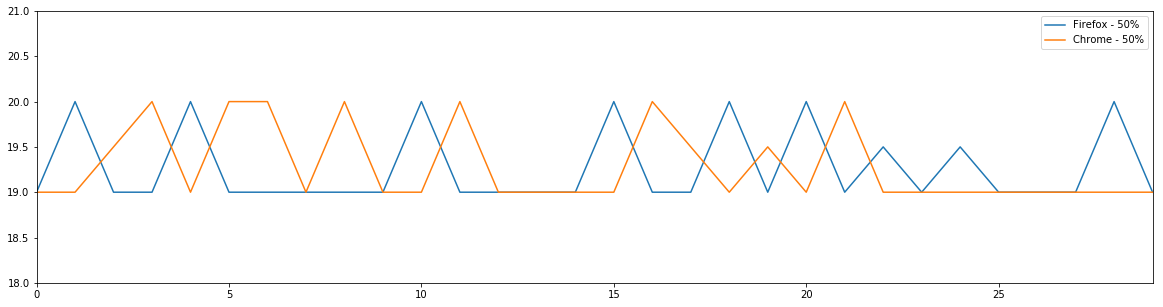

In [28]:
target_key = ['50%']
target_data, max_y, min_y = get_specific_pair_data(firefox_describe, chrome_describe, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

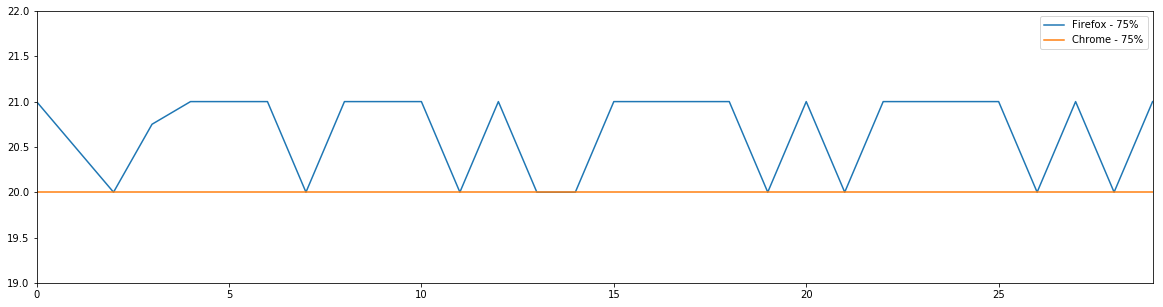

In [29]:
target_key = ['75%']
target_data, max_y, min_y = get_specific_pair_data(firefox_describe, chrome_describe, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

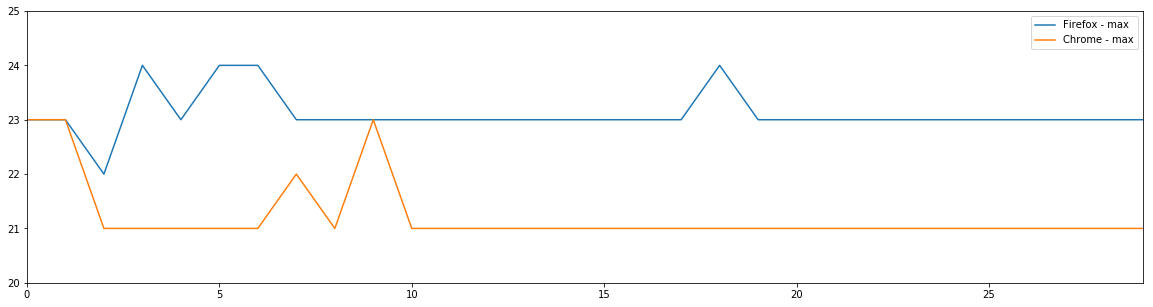

In [30]:
target_key = ['max']
target_data, max_y, min_y = get_specific_pair_data(firefox_describe, chrome_describe, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

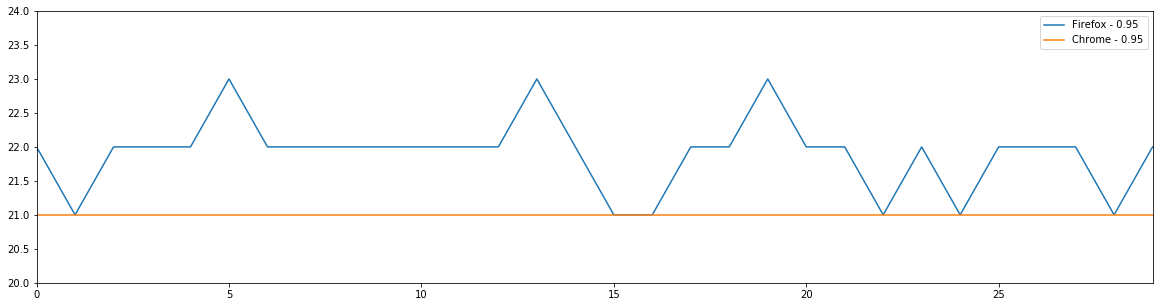

In [31]:
target_key = [0.95]
target_data, max_y, min_y = get_specific_pair_data(firefox_quantile, chrome_quantile, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

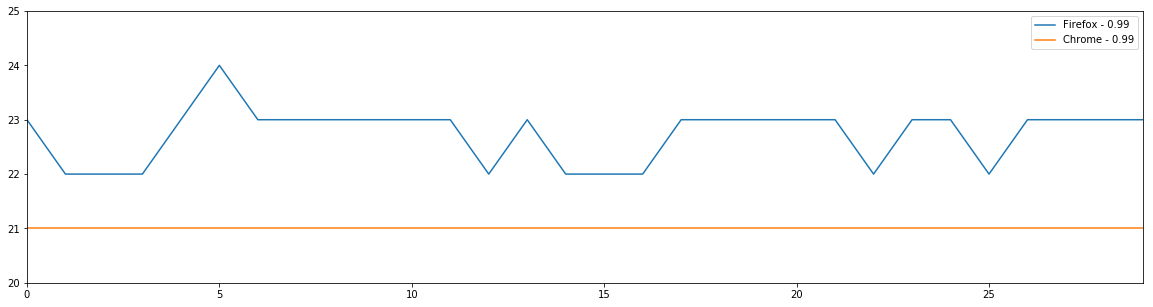

In [ ]:
target_key = [0.99]
target_data, max_y, min_y = get_specific_pair_data(firefox_quantile, chrome_quantile, target_key)
target_data.T.plot(layout=(1,1), figsize=(20,5), ylim=(round(min_y*0.95), round(max_y*1.05)))
plt.show()

In [ ]:
print str(chrome_case)
max_y = 0
for col in chrome_frame:
    if max(chrome_frame[col]) > max_y:
        max_y = max(chrome_frame[col])
chrome_frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
chrome_frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()
print 'Correlation score: %f' % sum(chrome_frame.corr().cumsum().T[chrome_frame.shape[1]-1])

In [ ]:
print str(chrome_case)
out_data = []
for col in chrome_frame:
    data = []
    new_data = []
    for num_dup_frame in chrome_frame[col]:
        if num_dup_frame > 1:
            data.append(pd.Series(list(np.arange(1, num_dup_frame + 1))))
        else:
            data.append(pd.Series([num_dup_frame]))
    new_data = pd.concat(data, ignore_index=True)
    out_data.append(new_data)
out_data = pd.concat(out_data, ignore_index=True, axis=1)
out_data.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()
print 'Correlation score: %f' % sum(out_data.corr().cumsum().T[out_data.shape[1]-1])

In [ ]:
print str(firefox_case)
max_y = 0
for col in firefox_frame:
    if max(firefox_frame[col]) > max_y:
        max_y = max(firefox_frame[col])
firefox_frame.hist( layout=(6,5), sharey=True, sharex=True, figsize=(20,20))
firefox_frame.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()
print 'Correlation score: %f' % sum(firefox_frame.corr().cumsum().T[firefox_frame.shape[1]-1])

In [ ]:
print str(firefox_case)
out_data = []
for col in firefox_frame:
    data = []
    new_data = []
    for num_dup_frame in firefox_frame[col]:
        if num_dup_frame > 1:
            data.append(pd.Series(list(np.arange(1, num_dup_frame + 1))))
        else:
            data.append(pd.Series([num_dup_frame]))
    new_data = pd.concat(data, ignore_index=True)
    out_data.append(new_data)
out_data = pd.concat(out_data, ignore_index=True, axis=1)
out_data.plot(subplots=True, layout=(fig_no,1), figsize=(20,30), ylim=(0,round(max_y*1.1)))
plt.show()
print 'Correlation score: %f' % sum(out_data.corr().cumsum().T[out_data.shape[1]-1])